In [1]:
import os
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 모델 생성(pre-trained model가져오기)
model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

IMAGE_SHAPE = (224, 224)

layer = hub.KerasLayer(model_url, input_shape=IMAGE_SHAPE+(3,))
model = tf.keras.Sequential([layer])


Metal device set to: Apple M1 Pro


2022-09-03 14:41:52.834850: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-03 14:41:52.835287: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-03 14:41:53.580204: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-03 14:41:53.582968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-03 14:41:53.753893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [3]:
tf.__version__

'2.9.2'

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              3413024   
                                                                 
Total params: 3,413,024
Trainable params: 0
Non-trainable params: 3,413,024
_________________________________________________________________


In [5]:
# 특징벡터 추출 함수
def extract(file):
    file = Image.open(file).convert('L').resize(IMAGE_SHAPE)
    #display(file)

    file = np.stack((file,)*3, axis=-1)

    file = np.array(file)/255.0

    embedding = model.predict(file[np.newaxis, ...])
    #print(embedding)
    vgg16_feature_np = np.array(embedding)
    flattended_feature = vgg16_feature_np.flatten()

    #print(len(flattended_feature))
    #print(flattended_feature)
    #print('-----------')
    return flattended_feature

In [6]:
# path 잡아주면 파일명 리스트로 추출
path = "../crops/book/book"
file_list = os.listdir(path)
file_list_img = [file for file in file_list if file.endswith(".png") or file.endswith(".jpeg") or file.endswith(".jpg")]


In [7]:
# dataFrame에 파일명과 벡터값을 저장
tmp_df = pd.DataFrame()
for i, img in enumerate(file_list_img):
    output = extract(path+'/'+img)
    tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)


2022-09-03 14:41:54.699099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 15ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 14ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - ETA: 0s

/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 15ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 14ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 14ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 15ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 15ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 13ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 14ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 14ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 13ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - ETA: 0s

/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 15ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 14ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 14ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 14ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 14ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 15ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 13ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 15ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 14ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 15ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 14ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 13ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

1/1 [==============================] - 0s 14ms/step


/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)
/var/folders/wv/bnpq1s_d23qg2x2m69xg48gc0000gn/T/ipykernel_20967/270475476.py:5: FutureWarning: The frame.append method i

In [8]:
tmp_df.head()

filename                                             output
0   V0001519H05130008-1.jpg  [0.20292231, 0.09413153, 0.42999306, 2.0739686...
1  V0002164H03200010-17.jpg  [0.13937017, 0.0, 0.0, 0.0053506317, 0.0, 0.95...
2   V0000339H08220016-1.jpg  [0.62630635, 0.017568039, 0.0, 1.0444416, 0.36...
3   F2022042800001942-1.jpg  [0.0, 0.0, 0.07574188, 0.52743906, 0.03651506,...
4   V0000336H07280012-1.jpg  [0.42765045, 0.0, 0.08592, 0.008590498, 0.0620...

In [10]:
# 각 사진들의 유사도를 측정하기
from scipy.spatial import distance
metric = 'cosine'
# metric으로 'euclidean', 'cosine', 'dot' 등등 사용 가능
#https://docs.scipy.org/doc/scipy/reference/spatial.distance.html?highlight=distance

cos_sim_array = np.zeros((len(tmp_df),len(tmp_df)))
for i in range(0, len(tmp_df)):
    for j in range(0, len(tmp_df)):
        cos_sim_array[i][j] = distance.cdist([tmp_df.iloc[i, 1]] , [tmp_df.iloc[j, 1]], metric)[0]


In [11]:
# 파일들의 유사도를 담은 데이터 프레음 생성
file_list = tmp_df['filename'].tolist()
cos_sim_df = pd.DataFrame(cos_sim_array, index=file_list, columns=file_list)

In [12]:
cos_sim_df.head(10)

V0001519H05130008-1.jpg  V0002164H03200010-17.jpg  \
V0001519H05130008-1.jpg                  0.000000                  0.739653   
V0002164H03200010-17.jpg                 0.739653                  0.000000   
V0000339H08220016-1.jpg                  0.500250                  0.657134   
F2022042800001942-1.jpg                  0.469093                  0.757811   
V0000336H07280012-1.jpg                  0.574954                  0.691763   
V0002056H07300002-1.jpg                  0.632095                  0.461061   
F2022081200000646-1.jpg                  0.549839                  0.660889   
F2022062300002416-12.jpg                 0.660240                  0.551484   
F2022070800002276-13.jpg                 0.689206                  0.607053   
F2022080900001971-12.jpg                 0.571280                  0.725277   

                          V0000339H08220016-1.jpg  F2022042800001942-1.jpg  \
V0001519H05130008-1.jpg              5.002502e-01             4.690928e-01   
V0002164H03200010-17.jpg             6.571337e-01             7.578110e-01   
V0000339H08220016-1.jpg              1.110223e-16             4.559308e-01   
F2022042800001942-1.jpg              4.559308e-01             1.110223e-16   
V0000336H07280012-1.jpg              5.955461e-01             6.245836e-01   
V0002056H07300002-1.jpg              5.027715e-01             6.207830e-01   
F2022081200000646-1.jpg              4.740608e-01             5.342227e-01   
F2022062300002416-12.jpg             5.697354e-01             6.563924e-01   
F2022070800002276-13.jpg             6.529208e-01             7.207761e-01   
F2022080900001971-12.jpg             6.281029e-01             4.847895e-01   

                          V0000336H07280012-1.jpg  V0002056H07300002-1.jpg  \
V0001519H05130008-1.jpg                  0.574954                 0.632095   
V0002164H03200010-17.jpg                 0.691763                 0.461061   
V0000339H08220016-1.jpg                  0.595546                 0.502771   
F2022042800001942-1.jpg                  0.624584                 0.620783   
V0000336H07280012-1.jpg                  0.000000                 0.646601   
V0002056H07300002-1.jpg                  0.646601                 0.000000   
F2022081200000646-1.jpg                  0.616270                 0.589952   
F2022062300002416-12.jpg                 0.668507                 0.452851   
F2022070800002276-13.jpg                 0.740509                 0.580484   
F2022080900001971-12.jpg                 0.502012                 0.621099   

                          F2022081200000646-1.jpg  F2022062300002416-12.jpg  \
V0001519H05130008-1.jpg              5.498388e-01                  0.660240   
V0002164H03200010-17.jpg             6.608892e-01                  0.551484   
V0000339H08220016-1.jpg              4.740608e-01                  0.569735   
F2022042800001942-1.jpg              5.342227e-01                  0.656392   
V0000336H07280012-1.jpg              6.162700e-01                  0.668507   
V0002056H07300002-1.jpg              5.899520e-01                  0.452851   
F2022081200000646-1.jpg              2.220446e-16                  0.651790   
F2022062300002416-12.jpg             6.517904e-01                  0.000000   
F2022070800002276-13.jpg             6.734101e-01                  0.632663   
F2022080900001971-12.jpg             6.459520e-01                  0.655417   

                          F2022070800002276-13.jpg  F2022080900001971-12.jpg  \
V0001519H05130008-1.jpg               6.892058e-01              5.712797e-01   
V0002164H03200010-17.jpg              6.070527e-01              7.252765e-01   
V0000339H08220016-1.jpg               6.529208e-01              6.281029e-01   
F2022042800001942-1.jpg               7.207761e-01              4.847895e-01   
V0000336H07280012-1.jpg               7.405091e-01              5.020122e-01   
V0002056H07300002-1.jpg               5.804839e-01              6.210990e-01   
F2022081

In [13]:
def show_sim(filename):
    sim_series = cos_sim_df[filename].sort_values(ascending=True)[:10]
    f, ax = plt.subplots(2, 5, figsize=(40,20))
    for i in range(len(sim_series)): 
        tmp_img = Image.open(path+'/'+sim_series.index[i]).convert('RGB')
        sim = f'cos : {sim_series[i]:.3f}' 
        ax[i//5][i%5].imshow(tmp_img, aspect='auto')
        if i == 0: 
            title = f'original \n{sim_series.index[i]}' 
        else: title = f'similarity no.{i} \n{sim_series.index[i]}'
        ax[i//5][i%5].set_title(title, pad=20, size=25) # 5열짜리 표를 만드는 것이므로 단순히 5로 나눈 나머지와 몫을 사용한 것임
        ax[i//5][i%5].annotate(sim, (0,10), fontsize=18, color='red') # 유사도를 그림 좌측 상단에 표시
        ax[i//5][i%5].set_xticks([]); ax[i//5][i%5].set_yticks([])
    
    # plt로 출력된 이미지를 사진으로 저장하기
    # fig1 = plt.gcf() # plt.show 이후에 save를 하면 안되니까 미리 fig 저장
    plt.show()
    # fig1.savefig(f'test_{filename}', format='jpeg')


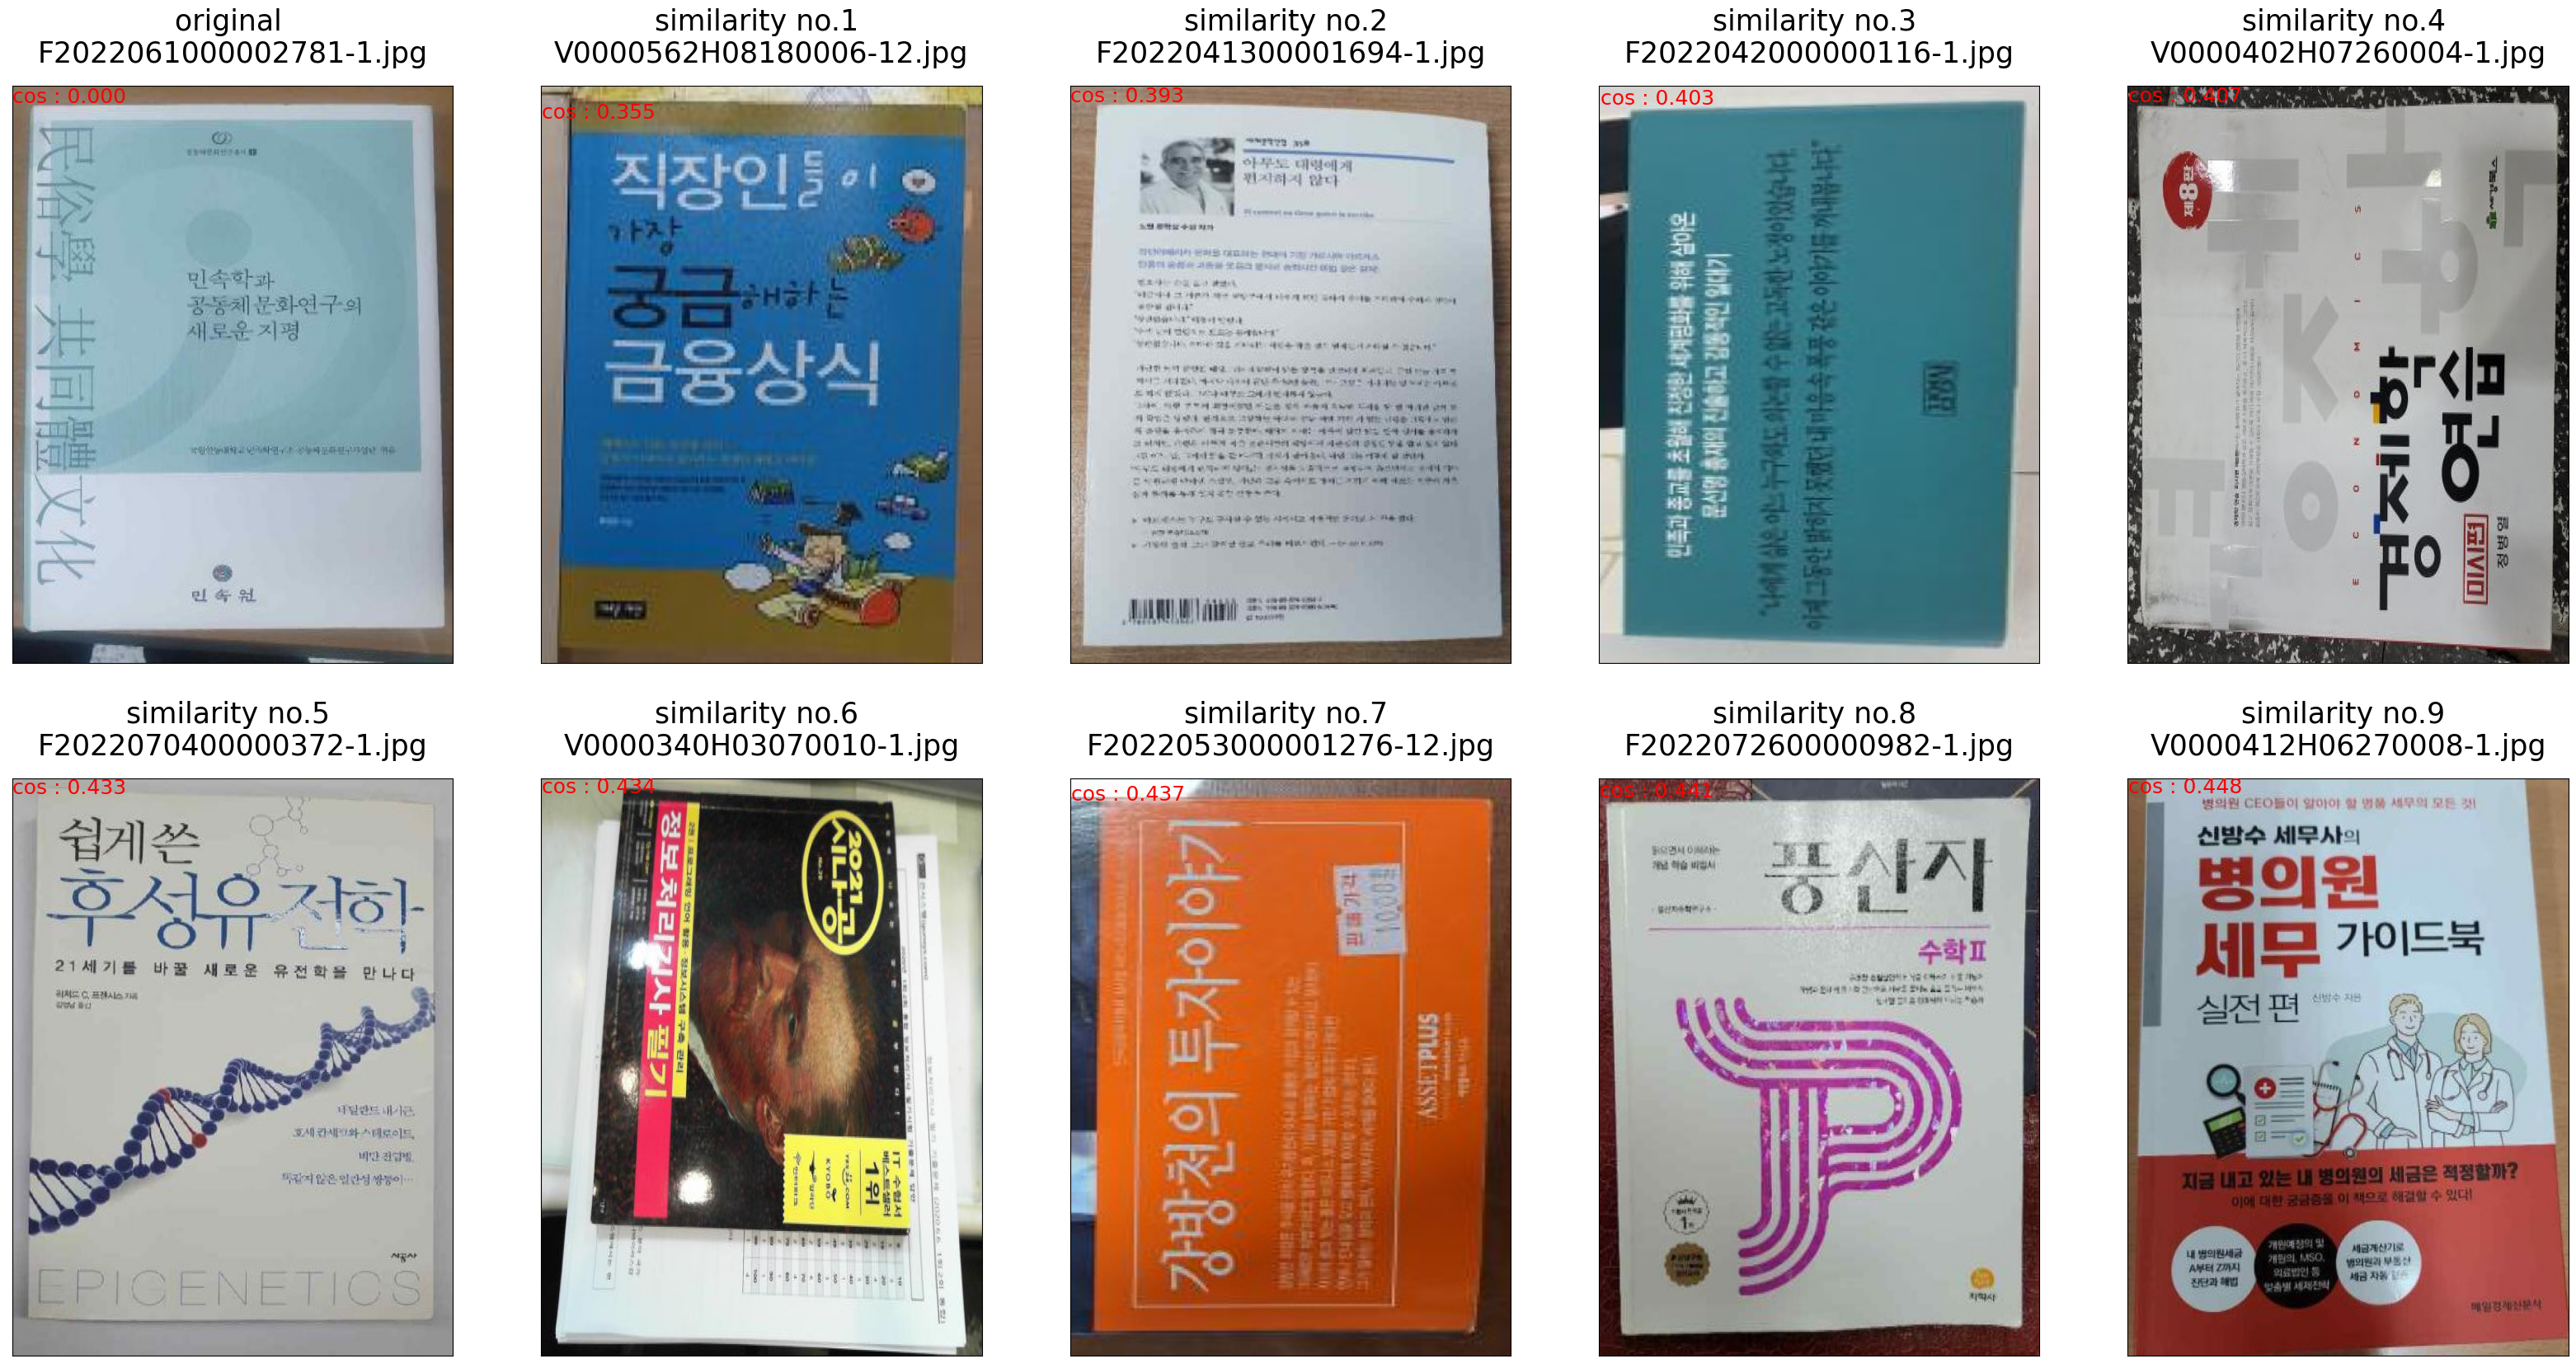

In [14]:
show_sim('F2022061000002781-1.jpg')

In [15]:
tmp_df.tail()

filename  \
158  V0002108H06010016-13.jpg   
159  F2022053000001276-12.jpg   
160   F2022062300002416-1.jpg   
161  V0002108H06010016-12.jpg   
162   V0001992H08200002-1.jpg   

                                                output  
158  [0.013652436, 0.45028028, 0.09749665, 0.082906...  
159  [0.6028245, 0.0, 0.0, 0.7899847, 0.0058228243,...  
160  [1.7689174, 0.0, 0.0, 0.2317738, 0.009965466, ...  
161  [0.0, 0.0, 0.0, 0.11758258, 0.030116573, 0.0, ...  
162  [1.070827, 0.0724809, 0.36046404, 0.015606916,...

In [16]:
input_picture = '' # 경로
output = extract(input_picture)
tmp_df = tmp_df.append({'filename':input_picture, 'output':output}, ignore_index=True)

# 코드 추후 수정 필요(더 빨리 작동할 수 있게)
cos_sim_array = np.zeros((len(tmp_df),len(tmp_df)))
for i in range(0, len(tmp_df)):
    for j in range(0, len(tmp_df)):
        cos_sim_array[i][j] = distance.cdist([tmp_df.iloc[i, 1]] , [tmp_df.iloc[j, 1]], metric)[0]


AttributeError: 'str' object has no attribute 'read'